In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import ensemble
from sklearn import multioutput
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
data = pd.read_excel('./recal2data.xlsx')

In [28]:
del data['중분류']

In [29]:
data.columns

Index(['브랜드', '상호', '가맹점수', '가맹본부 임직원수', '신규개점', '계약종료', '계약해지', '명의변경',
       '가입비(가맹비)', '교육비', '보증금', '기타비용', '인테리어 평당 비용', '인테리어 기준면적',
       '인테리어 총 비용', '자산', '매출액', '영업이익', '총자산증가율', '매출액증가율', '영업이익증가율', '자본',
       '당기순이익', '영업이익률', '매출액순이익률', '자기자본순이익률', '부채', '부채비율', '자기자본비율',
       '법위반횟수', '공정위시정조치', '민사소송', '형의 선고', '가맹점 평균매출액', '가맹사업 개월수', '매출액지수',
       '비용 합계', '창업비용 지수', '기타 외국식', '기타 외식', '분식', '서양식', '아이스크림/빙수 ',
       '음료 (커피 외)', '일식', '제과제빵', '주점', '중식', '치킨', '커피', '패스트푸드', '피자', '한식'],
      dtype='object')

In [30]:
data = data.replace([np.inf, -np.inf], np.nan)

In [31]:
data = data.fillna(0)

In [43]:
data[np.isnan(data[''])]

,브랜드,상호,가맹점수,가맹본부 임직원수,신규개점,계약종료,계약해지,명의변경,가입비(가맹비),교육비,...,음료 (커피 외),일식,제과제빵,주점,중식,치킨,커피,패스트푸드,피자,한식


In [44]:
data2 = data[['가맹점수', '가맹본부 임직원수', '신규개점', '계약종료', '계약해지', '명의변경','가입비(가맹비)', '교육비', '보증금', 
              '기타비용', '인테리어 평당 비용', '인테리어 기준면적','인테리어 총 비용', '자산', '매출액', '영업이익', '총자산증가율', 
              '매출액증가율', '영업이익증가율', '자본','당기순이익', '영업이익률', '매출액순이익률', '자기자본순이익률', '부채', 
              '부채비율', '자기자본비율','법위반횟수', '공정위시정조치', '민사소송', '형의 선고', '가맹점 평균매출액', '가맹사업 개월수', 
              '매출액지수','비용 합계', '창업비용 지수', '기타 외국식', '기타 외식', '분식', '서양식', '아이스크림/빙수 ','음료 (커피 외)', 
              '일식', '제과제빵', '주점', '중식', '치킨', '커피', '패스트푸드', '피자', '한식']]

In [45]:
test = data2[(data2['가맹사업 개월수'] > 12) & (data2['가맹점 평균매출액'] == 0)]
train = data2[(data2['가맹사업 개월수'] < 13) | (data2['가맹점 평균매출액'] != 0)]

NameError: name 'test' is not defined

In [47]:
train_X = train[['가맹점수', '가맹본부 임직원수', '신규개점', '계약종료', '계약해지', '명의변경','가입비(가맹비)', '교육비', '보증금',
                 '기타비용', '인테리어 평당 비용', '인테리어 기준면적','인테리어 총 비용', '자산', '매출액', '영업이익', '자본','당기순이익', 
                 '부채', '공정위시정조치', '민사소송', '형의 선고', '가맹사업 개월수', '기타 외국식', '기타 외식', '분식','서양식',
                 '아이스크림/빙수 ','음료 (커피 외)', '일식', '제과제빵', '주점', '중식', '치킨', '커피', '패스트푸드', '피자', '한식']]
train_y = train[['가맹점 평균매출액']]
test_X = test[['가맹점수', '가맹본부 임직원수', '신규개점', '계약종료', '계약해지', '명의변경','가입비(가맹비)', '교육비', '보증금', 
               '기타비용', '인테리어 평당 비용', '인테리어 기준면적','인테리어 총 비용', '자산', '매출액', '영업이익', '자본','당기순이익',
               '부채', '공정위시정조치', '민사소송', '형의 선고', '가맹사업 개월수', '기타 외국식', '기타 외식', '분식','서양식',
               '아이스크림/빙수 ','음료 (커피 외)', '일식', '제과제빵', '주점', '중식', '치킨', '커피', '패스트푸드', '피자', '한식']]
test_y = test[[ '가맹점 평균매출액']]

In [48]:
len(test_X)

2342

In [49]:
rfReg  = ensemble.RandomForestRegressor()

In [50]:
rfReg.fit(train_X,train_y)

C:\Users\ce401Prof\bigdata\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [51]:
rfPred = rfReg.predict(test_X)

In [52]:
rfPred

array([492428.1, 199502.7, 369194.2, ..., 407863. , 357582.3, 451230.4])

In [53]:
rfReg.score(train_X,train_y)

0.9156782020241268

In [54]:
importances = rfReg.feature_importances_
std = np.std([rfReg.feature_importances_ for tree in rfReg.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]
colnames = [train_X.columns[i] for i in np.argsort(importances)[::-1]]

In [55]:
print("Feature ranking:")

for f in range(train_X.shape[1]):
    print("%d. %s : (%f)"%(indices[f], colnames[f], importances[indices[f]]))

Feature ranking:
11. 인테리어 기준면적 : (0.215996)
9. 기타비용 : (0.153796)
22. 가맹사업 개월수 : (0.148425)
8. 보증금 : (0.071191)
6. 가입비(가맹비) : (0.069686)
12. 인테리어 총 비용 : (0.056576)
16. 자본 : (0.035251)
14. 매출액 : (0.029466)
1. 가맹본부 임직원수 : (0.026135)
2. 신규개점 : (0.024653)
0. 가맹점수 : (0.021423)
17. 당기순이익 : (0.019811)
7. 교육비 : (0.018600)
15. 영업이익 : (0.016612)
10. 인테리어 평당 비용 : (0.014490)
4. 계약해지 : (0.013911)
18. 부채 : (0.011418)
34. 커피 : (0.009430)
13. 자산 : (0.008834)
29. 일식 : (0.006430)
5. 명의변경 : (0.006280)
3. 계약종료 : (0.005953)
37. 한식 : (0.005011)
24. 기타 외식 : (0.003262)
26. 서양식 : (0.002322)
19. 공정위시정조치 : (0.001697)
31. 주점 : (0.001077)
25. 분식 : (0.000759)
30. 제과제빵 : (0.000368)
33. 치킨 : (0.000319)
36. 피자 : (0.000285)
23. 기타 외국식 : (0.000162)
32. 중식 : (0.000143)
28. 음료 (커피 외) : (0.000076)
27. 아이스크림/빙수  : (0.000067)
20. 민사소송 : (0.000051)
35. 패스트푸드 : (0.000033)
21. 형의 선고 : (0.000000)


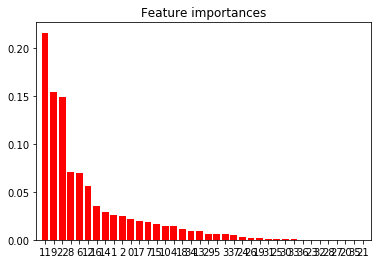

In [56]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_X.shape[1]), indices)
plt.xlim([-1, train_X.shape[1]])
plt.show()

In [141]:
len(rfPred[rfPred==0])

144

In [57]:
gbReg  = ensemble.GradientBoostingRegressor()
gbReg.fit(train_X,train_y)
gbPred = gbReg.predict(test_X)

C:\Users\ce401Prof\bigdata\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
gbPred

array([411327.13169487, 224785.74135475, 446724.66028082, ...,
       306102.21229619, 306102.21229619, 316914.00455592])

In [59]:
gbReg.score(train_X,train_y)

0.7941312650749207

Feature ranking:
9. 기타비용 : (0.111754)
11. 인테리어 기준면적 : (0.098300)
22. 가맹사업 개월수 : (0.085240)
6. 가입비(가맹비) : (0.073331)
8. 보증금 : (0.065801)
12. 인테리어 총 비용 : (0.061281)
17. 당기순이익 : (0.052406)
16. 자본 : (0.041262)
2. 신규개점 : (0.040599)
14. 매출액 : (0.038763)
0. 가맹점수 : (0.034734)
7. 교육비 : (0.033584)
1. 가맹본부 임직원수 : (0.032793)
10. 인테리어 평당 비용 : (0.032503)
34. 커피 : (0.029478)
4. 계약해지 : (0.023377)
15. 영업이익 : (0.020674)
13. 자산 : (0.019186)
27. 아이스크림/빙수  : (0.017723)
37. 한식 : (0.016155)
3. 계약종료 : (0.013543)
5. 명의변경 : (0.012503)
24. 기타 외식 : (0.011057)
28. 음료 (커피 외) : (0.008254)
29. 일식 : (0.007973)
35. 패스트푸드 : (0.005643)
18. 부채 : (0.005489)
19. 공정위시정조치 : (0.004053)
23. 기타 외국식 : (0.001711)
33. 치킨 : (0.000829)
26. 서양식 : (0.000000)
25. 분식 : (0.000000)
30. 제과제빵 : (0.000000)
31. 주점 : (0.000000)
32. 중식 : (0.000000)
21. 형의 선고 : (0.000000)
20. 민사소송 : (0.000000)
36. 피자 : (0.000000)


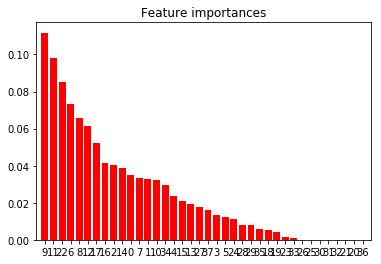

In [60]:
importances = gbReg.feature_importances_
std = np.std([gbReg.feature_importances_ for tree in gbReg.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]
colnames = [train_X.columns[i] for i in np.argsort(importances)[::-1]]
print("Feature ranking:")

for f in range(train_X.shape[1]):
    print("%d. %s : (%f)"%(indices[f], colnames[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(train_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_X.shape[1]), indices)
plt.xlim([-1, train_X.shape[1]])
plt.show()

In [137]:
len(gbPred[gbPred<=0])

53

In [126]:
pred = pd.DataFrame(rfPred)

In [135]:
pred = pd.DataFrame(gbPred)

In [127]:
pred.to_excel('data/rfpred.xlsx')

In [136]:
pred.to_excel('gbpred.xlsx')

In [ ]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)